In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
Base = automap_base()

In [7]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [8]:
# View all of the classes that automap found


In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
session.query(measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f87bbc126e0>,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [12]:
session.query(measurement.date).first()

('2010-01-01',)

In [33]:
# Find the most recent date in the data set.
last_date = max(session.query(measurement.date).all())


'2017-08-23'

In [14]:
#date prior
date_o = pd.to_datetime(last_date)
one_year = date_o - np.timedelta64(1,'Y')
one_year.strftime('%Y, %m, %d')[0]

'2016, 08, 22'

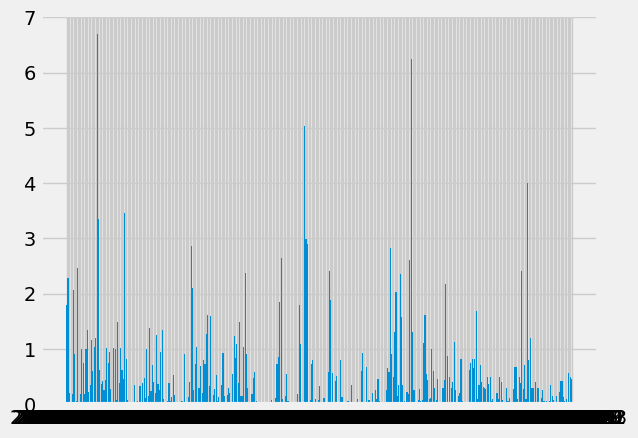

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date > one_year.strftime('%Y, %m, %d')[0].replace(', ','-')).order_by(measurement.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data)

# Sort the dataframe by date
sort = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data

# ** need to figure out how to sort date x axis**

# datetick('x','mm','keeplimits')?
ax = plt.bar(sort['date'], sort['prcp'])


In [28]:
percipitaion = {}
for x in data.all():
    percipitaion[x[1]] = x[0]

In [30]:
print(measurement.date)

measurement.date


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
data = session.query(measurement.station).all()
data = pd.DataFrame(data)
data.value_counts()

station    
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
data = session.query(measurement.tobs).filter(measurement.station == 'USC00519281')
data = pd.DataFrame(data.all())
awnser = []
awnser.append(min(data['tobs']))
awnser.append(max(data['tobs']))
awnser.append(data['tobs'].mean())
awnser

[54.0, 85.0, 71.66378066378067]

In [21]:
data = session.query(measurement.tobs, measurement.date).filter(measurement.station == 'USC00519281').filter(measurement.date > one_year.strftime('%Y, %m, %d')[0].replace(', ','-')).order_by(measurement.date) 

In [22]:
graph1 = pd.DataFrame(data)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([ 6., 10., 15., 27., 41., 58., 72., 86., 29.,  8.]),
 array([59. , 61.4, 63.8, 66.2, 68.6, 71. , 73.4, 75.8, 78.2, 80.6, 83. ]),
 <BarContainer object of 10 artists>)

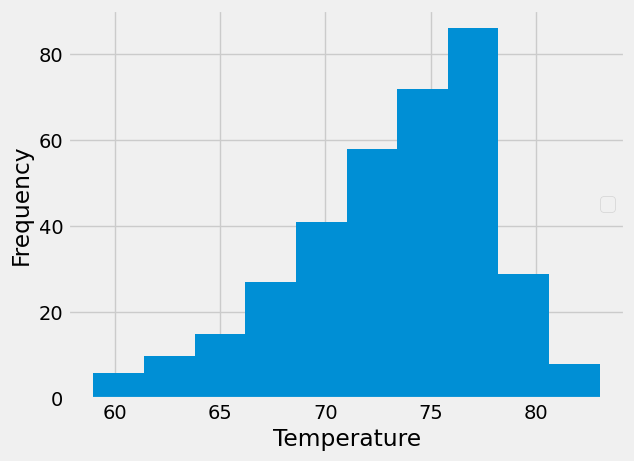

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


plt.xlabel('Temperature')
plt.ylabel('Frequency')


plt.legend(loc='right')



plt.hist(graph1['tobs'], label='tobs')


# Close Session

In [24]:
# Close Session
session.close()